In [ ]:
import sys, os
from pathlib import Path
from PIL import Image, ImageDraw, ImageFont

def find_project_root(start: Path):
    cur = start.resolve()
    for base in [cur, *cur.parents]:
        if (base / "src").is_dir():    
            return base
    raise RuntimeError("No encontré la raíz del proyecto (carpeta con 'src/').")

PROJECT_ROOT = find_project_root(Path.cwd())
print("PROJECT_ROOT ->", PROJECT_ROOT)

sys.path.insert(0, str(PROJECT_ROOT))

local_src = Path.cwd() / "src"
while str(local_src) in sys.path:
    sys.path.remove(str(local_src))

from src.inference.pipeline import prepare_from_path  
from src.utils.config import *               
from resnet101.src.model.resnet import ResNet                                    
from graphs_advance import *
import torch
from torch import nn
import numpy as np

PROJECT_ROOT -> C:\Users\alejo\OneDrive\Escritorio\Universidaad\Maestria Inteligencia de negocios\Segundo Semestre\Seminario Programacion\Proyecto_final


In [18]:

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = ResNet(num_classes=2, blocks_per_stage=(3,4,23,3)).to(device)

pesos = torch.load('..\\resnet101\\model_trained\\ResNet101.pth', map_location="cpu")
model.load_state_dict(pesos)

<All keys matched successfully>

In [19]:
out = prepare_from_path("..\\data/processed/examples_oxford/cat_example.jpg")
x = out["tensor"]
print(x.shape)

torch.Size([1, 3, 224, 224])


## Kernel Visualization 

In [20]:
panel = kernels_depth_matrix(model,
    cols=12,tile_px=150,     
    col_gap=20, pad_out_x=40,    
    pad_out_y=20,pad_row=12)

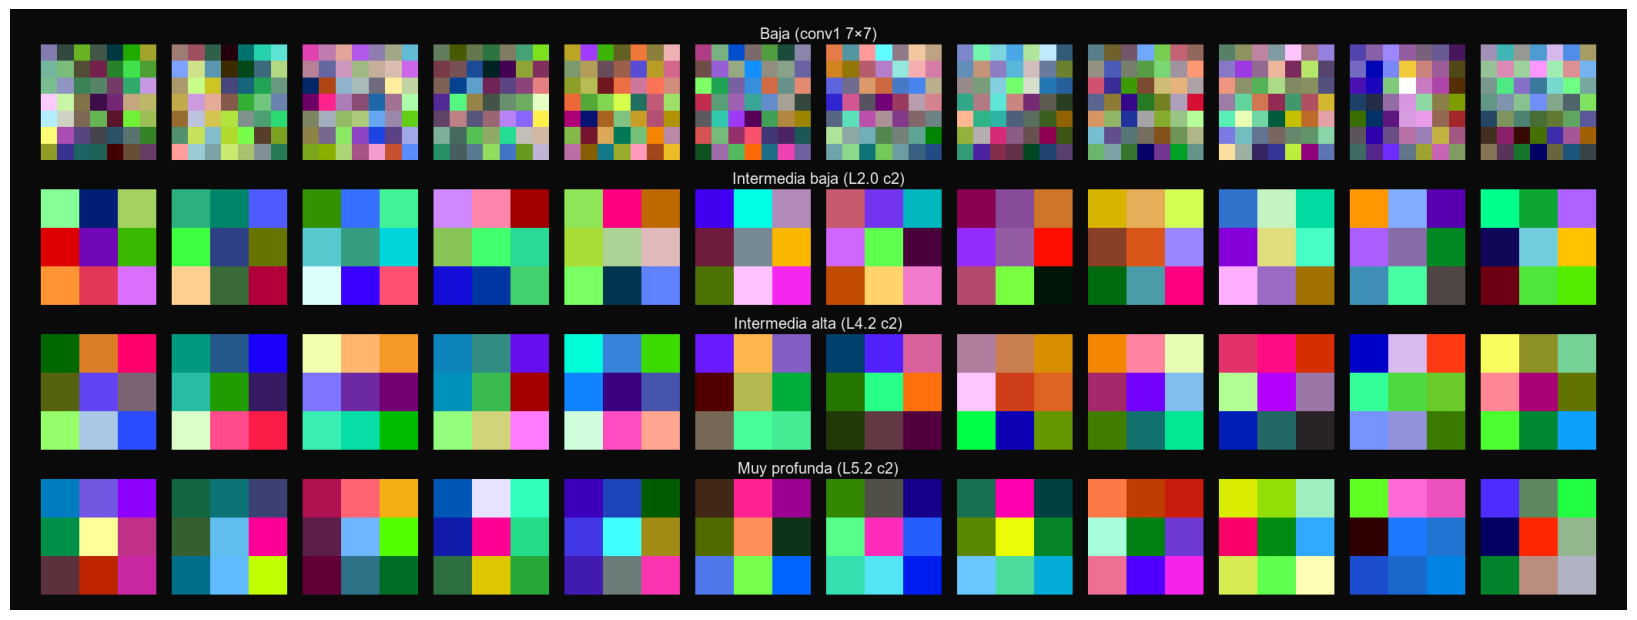

In [21]:
h, w = panel.shape[:2]
dpi = 100
plt.figure(figsize=(w/dpi, h/dpi), dpi=dpi) 
plt.imshow(panel)
plt.axis('off')
plt.show()

## Feature Maps 

In [22]:
model.eval()

panel_fm = feature_maps_depth_matrix(
    model, x,
    cols=12,         
    tile_px=140,  
    col_gap=16,
    row_title_px=20)

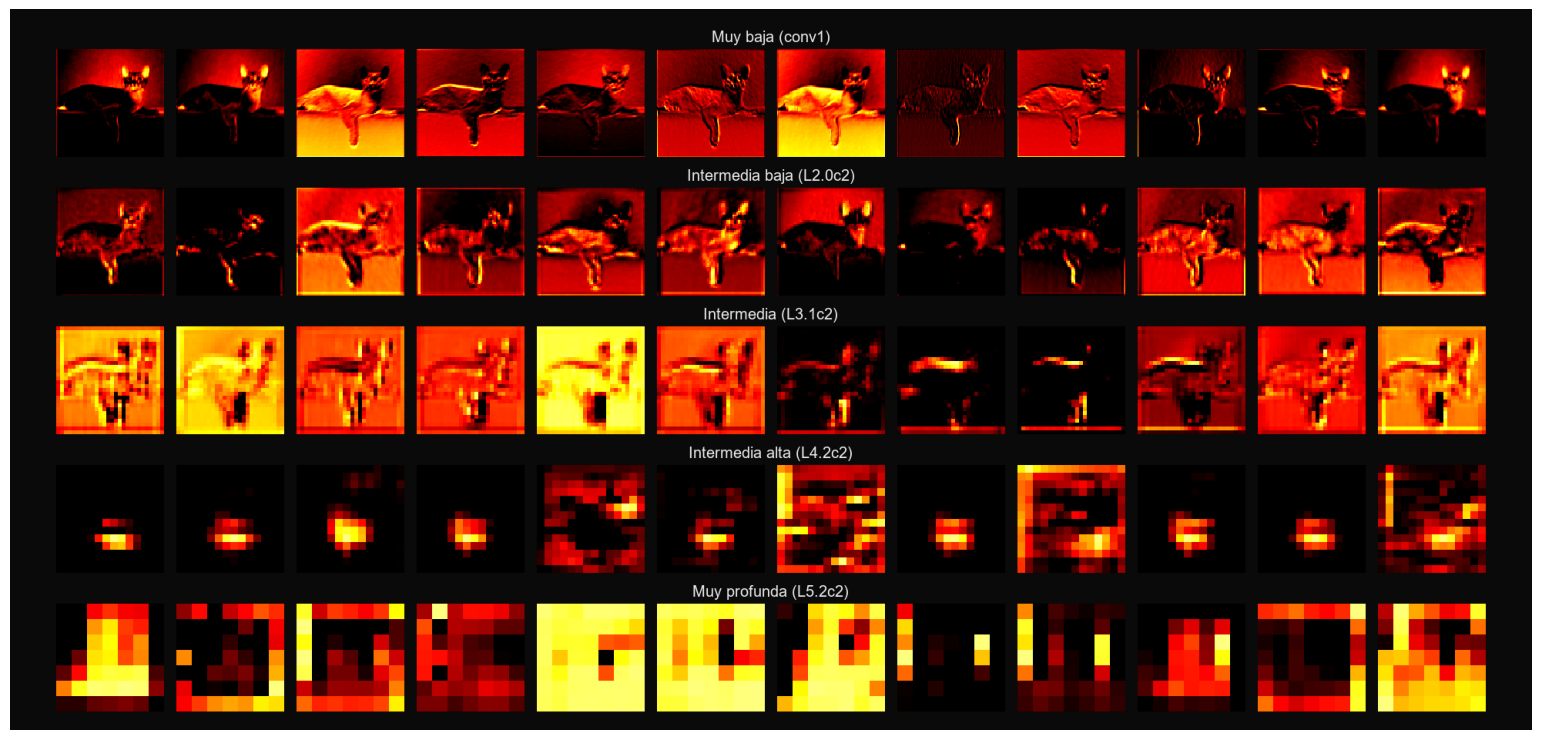

In [23]:
h, w = panel_fm.shape[:2]
dpi = 100
plt.figure(figsize=(w/dpi, h/dpi), dpi=dpi) 
plt.imshow(panel_fm)
plt.axis('off')
plt.show()

## GradCam

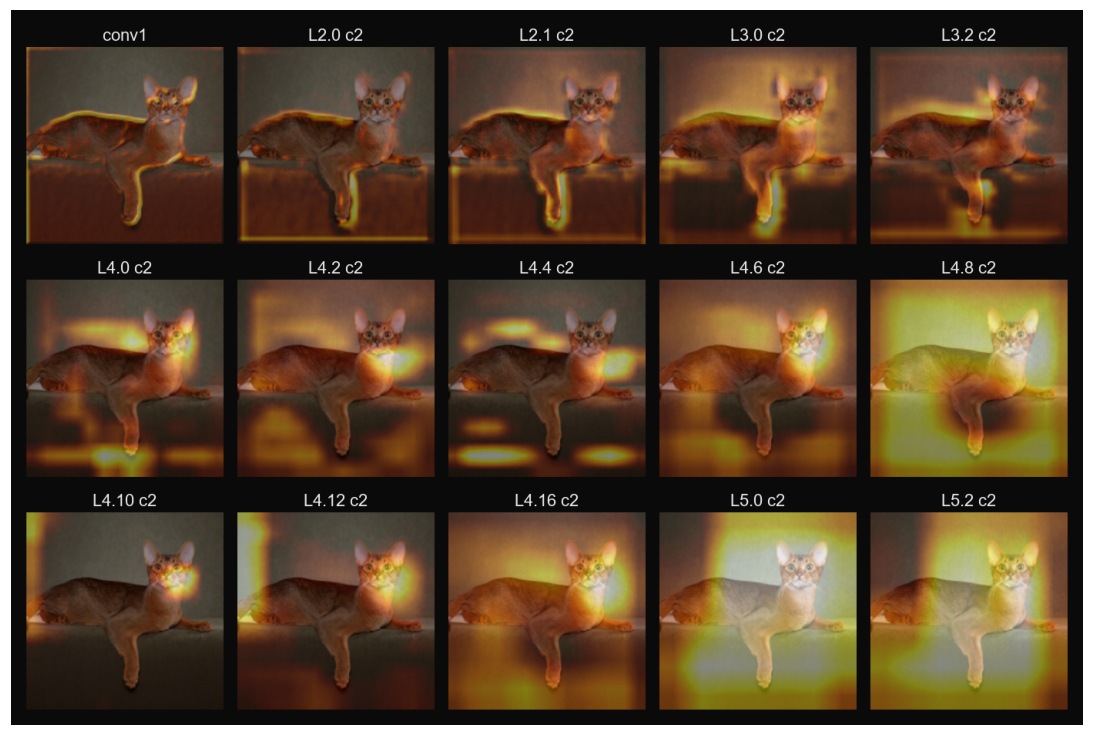

In [ ]:
from PIL import Image, ImageDraw, ImageFont


panel_3x5 = gradcam_grid_panel_using_your_fn(
    model, x,
    ncols=5,            
    tile_px=256,
    title_px=22,
    alpha=0.42,
    use_recolor=True,  
    cmap_mode="magma",  
    show_layer_path=False)


import matplotlib.pyplot as plt

h, w = panel_3x5.shape[:2]
plt.figure(figsize=(w/110, h/110), dpi=110)
plt.imshow(panel_3x5); plt.axis("off"); plt.show()

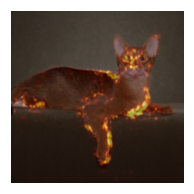

In [14]:
overlay = integrated_gradients_overlay(
    model, x,
    steps=32,                  
    smooth_samples=8,          
    smooth_sigma=0.01,
    baseline="blurred",         
    alpha=0.50,
    cmap_mode="magma",
    percentile_clip=99.5,      
    border_suppress=0.02)

import matplotlib.pyplot as plt

h,w = overlay.shape[:2]
plt.figure(figsize=(w/110, h/110), dpi=110)
plt.imshow(overlay); plt.axis('off'); plt.show()

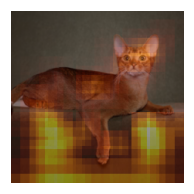

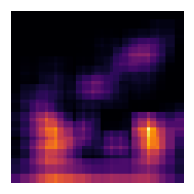

In [25]:
overlay, heat, cls_id, p0 = occlusion_sensitivity_overlay(
    model, x,
    patch=32, stride=12,     
    baseline="mean",          
    batch_size=64,
    alpha=0.45,
    cmap_mode="magma",
    agg="prob_drop")

import matplotlib.pyplot as plt
h, w = overlay.shape[:2]
plt.figure(figsize=(w/110, h/110), dpi=110); plt.imshow(overlay); plt.axis("off"); plt.show()
plt.figure(figsize=(w/110, h/110), dpi=110); plt.imshow(heat, cmap="inferno"); plt.axis("off"); plt.show()